In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

import pickle

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
random_state = 100
np.random.seed(100)

In [3]:
model_dir = "./models/"

In [40]:
example = 120

Image is Dog


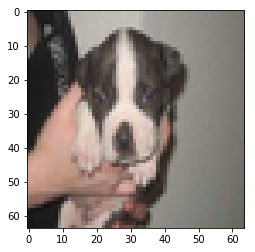

In [41]:
plt.imshow(x_train[example].reshape(64,64,3))
print("Image is {0}".format('Cat' if (y_train[example] == 0) else 'Dog'))

In [42]:
#Getting 
x_train,x_test, y_train,y_test = x_train.T,x_test.T, y_train.T,y_test.T

In [43]:
def initialize_params(x_n,h_n,y_n, isZeros = False):
    """
        It'll initialize the parameters 
    """
    
    np.random.seed(1)
    
    W1 = np.random.randn(h_n,x_n) * 0.01 if isZeros else np.zeros((h_n,x_n))
    b1 = np.zeros((h_n,1))
    #W2 = np.random.randn(y_n,h_n) if isZeros else np.zeros((y_n,h_n))
    W2 = np.random.randn(y_n,h_n)
    b2 = np.zeros((y_n,1))
    
    
    parameters = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    return parameters


In [4]:
def load_data():
    trainfile = h5py.File('dataset/train_cat.h5', "r")
    testfile = h5py.File('dataset/test_cat.h5', 'r')
    
    x_train = np.array(trainfile['train_set_x'][:])
    y_train = np.array(trainfile['train_set_y'][:])
    
    x_test = np.array(testfile['test_set_x'][:])
    y_test = np.array(testfile['test_set_y'][:])
    
    return x_train, x_test, y_train.reshape(1,y_train.shape[0]), y_test.reshape(1, y_test.shape[0])

In [5]:
x_train, x_test, y_train, y_test = load_data()
print("Dataset with Xtrain(shape : {0}) and Ytrain(shape : {1})".format(x_train.shape, y_train.shape))

Dataset with Xtrain(shape : (209, 64, 64, 3)) and Ytrain(shape : (1, 209))


Image is Cat


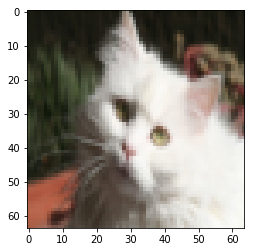

In [6]:
example_num = 102
plt.imshow(x_train[example_num])
print("Image is", 'Cat' if y_train[:,example_num] == 1 else 'Not Cat')

In [7]:
x_train_unfolded, x_test_unfolded = x_train.reshape(x_train.shape[0],64*64*3).T, x_test.reshape(x_test.shape[0],64*64*3).T

Image is Cat


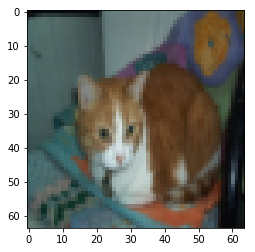

In [24]:
example = 134
plt.imshow(x_train[example].reshape(64,64,3))
print("Image is {0}".format('Cat' if (y_train[:,example] == 1) else 'Not Cat'))

In [25]:
print("Training dataset with Xtrain(shape : {0}) and Ytrain(shape : {1})".format(x_train_unfolded.shape, y_train.shape))
print("Testing dataset with Xtest(shape : {0}) and Ytest(shape : {1})".format(x_test_unfolded.shape, y_test.shape))

Training dataset with Xtrain(shape : (12288, 209)) and Ytrain(shape : (1, 209))
Testing dataset with Xtest(shape : (12288, 50)) and Ytest(shape : (1, 50))


In [26]:
x_train_norm, x_test_norm = x_train_unfolded/255, x_test_unfolded/255

In [27]:
print("Training dataset with Xtrain(shape : {0}) and Ytrain(shape : {1})".format(x_train_unfolded.shape, y_train.shape))
print("Testing dataset with Xtest(shape : {0}) and Ytest(shape : {1})".format(x_test_unfolded.shape, y_test.shape))

Training dataset with Xtrain(shape : (12288, 209)) and Ytrain(shape : (1, 209))
Testing dataset with Xtest(shape : (12288, 50)) and Ytest(shape : (1, 50))


In [28]:
def sigmoid(x):
    """ return sigmoid of scalar or np array"""
    return 1/ (1+np.exp(-x))

In [29]:
def forward_prop(X, parameters):
    """ forward prop"""
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = W1.dot(X) + b1
    A1 = np.tanh(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)

    forwarded = {
        "Z1" : Z1,
        "A1": A1,
        "Z2" : Z2,
        "A2":A2
    }
    
    return forwarded

In [30]:
def compute_cost(forwarded, Y):
    """ comptes cost over 1 iteration """
    
    m = Y.shape[1]
    A2 = forwarded["A2"]
    
    cost = - ( (1/m) * np.sum( Y*np.log(A2) + (1 -Y)*np.log((1-A2)) ) )
    cost = np.squeeze(cost)
    
    return cost

In [31]:
def back_prop(X, Y, parameters, forwarded):
    """ performs back prop """
    
    m = X.shape[0]
    
    A2 = forwarded["A2"]
    A1 = forwarded["A1"]
    W2 = parameters["W2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * (1-np.power(A1,2))
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {
        "dW2":dW2,
        "db2":db2,
        "dW1":dW1,
        "db1":db1
    }
    return gradients

In [32]:
def initialize_params(x_n,h_n,y_n, isZeros = False):
    """
        It'll initialize the parameters 
    """
    
    np.random.seed(1)
    
    W1 = np.random.randn(h_n,x_n) * 0.01 if isZeros else np.zeros((h_n,x_n))
    b1 = np.zeros((h_n,1))
    #W2 = np.random.randn(y_n,h_n) if isZeros else np.zeros((y_n,h_n))
    W2 = np.random.randn(y_n,h_n)
    b2 = np.zeros((y_n,1))
    
    
    parameters = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    return parameters


In [33]:
def update_params(parameters, gradients, learning_rate=0.01):
    """ updates params after back_prop"""
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    
    W1 = W1 - (learning_rate*dW1)
    b1 = b1 - (learning_rate*db1)
    W2 = W2 - (learning_rate*dW2)
    b2 = b2 - (learning_rate*db2)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [34]:
def model(x_train, y_train, x_test, y_test, h_n=4, num_iterations=1000, learning_rate=0.1, print_cost=False):
    """model """
    
    n_x = x_train.shape[0]
    y_n = y_train.shape[0]
    
    params = initialize_params(n_x,h_n,y_n, False)
    #print(params["W1"])
    costs = []
    
    for i in range(0,num_iterations):
        
        forwarded = forward_prop(x_train, params)
        
        cost = compute_cost(forwarded, y_train)
        
        gradients = back_prop(x_train, y_train, params, forwarded)
        
        params = update_params(params, gradients,learning_rate)
        
        if i%100 == 0 and print_cost:
            print("Cost after {0} interation is : {1}".format(i,cost))
            
        if i%100 == 0:
            costs.append(cost)
    
    train_accuracy = (100-np.mean(np.abs(predict(params,x_train) - y_train))*100 )
    test_accuracy = (100-np.mean(np.abs(predict(params,x_test) - y_test)) *100 )
    model = {
        "params":params,
        "train_accuracy":train_accuracy,
        "test_accuracy":test_accuracy,
        "costs":costs
    }
    return model

In [35]:
def predict(params, X):
    """ returns Prediction """
    
    m = X.shape[0]
    preds = np.zeros((1,m))
    
    forwarded = forward_prop(X, params)
    A2 = forwarded["A2"]
    #print("A2 shape", A2[0])
    preds = np.array([0 if p<=0.5 else 1 for p in A2[0] ])
    return preds

In [36]:
def saveModel(params, name):
    f = open( model_dir + name + ".model", "wb" )
    pickle.dump( params,f )
    f.close()

In [37]:
def loadModel(name):
    f = open(model_dir + name + ".model", "rb")
    model = pickle.load(f)
    f.close()
    return model

In [38]:
_model = model(x_train_norm, y_train, x_test_norm, y_test, 20, 1000, 0.01, True)

Cost after 0 interation is : 0.6931471805599453
Cost after 100 interation is : 0.5044909461595374
Cost after 200 interation is : 0.43829705850382694
Cost after 300 interation is : 0.39285633835850536
Cost after 400 interation is : 0.35791605670463156
Cost after 500 interation is : 0.32967763902527736
Cost after 600 interation is : 0.306124255895054
Cost after 700 interation is : 0.2860380839843241
Cost after 800 interation is : 0.2686220752715009
Cost after 900 interation is : 0.25332424923537045


In [44]:
print("training accuracy: {0} %".format(_model["train_accuracy"]))
preds = predict(_model["params"], x_test_norm)
print("Test accuracy: {0} %".format(_model["test_accuracy"]))

training accuracy: 96.17224880382776 %
Test accuracy: 74.0 %


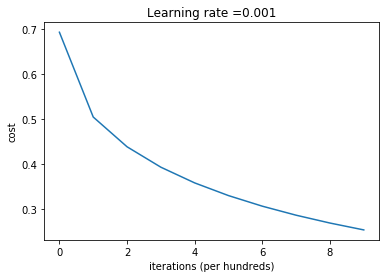

In [45]:
costs = np.squeeze(_model["costs"])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.001))
plt.show()

In [46]:
from PIL import Image
from scipy import ndimage
import scipy

In [47]:
num_px=64

In [49]:
fname = "black_cat.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
img = np.array(scipy.misc.imresize(image, size=(num_px,num_px)))

In [50]:
_t = img.reshape(64*64*3,1)

In [51]:
predict(_model["params"],_t)[0]

1

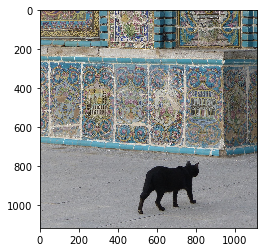

In [52]:
plt.imshow(image)

#### Models with different params 

In [58]:
hidden_units = [[5,1000], [10,2000], [20,5000], [50,1000]]

for i, (h_n,iteratons) in enumerate(hidden_units):
    _model = model(x_train, y_train, x_test, y_test, h_n, iteratons, 0.01, False)
    
    model_name = "hn_"+str(h_n)+ "__iter"+str(iteratons) + "__tracc_"+str(round(_model["train_accuracy"],2))+"__ts_acc_"+str(round(_model["test_accuracy"],2))
    saveModel(_model, model_name)
    plt.figure(figsize=(16, 32))
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % h_n)
    plt.plot(costs)

KeyboardInterrupt: 